In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
!pwd

/work/athira/Ciona_tracking-Athira-2021-05-25


In [12]:
config_path = '/work/athira/Ciona_tracking-Athira-2021-05-25/config.yaml'

df_train_stats_list = []
for shuffle in [1,2,3,4]:
    train_folder_path = f'./dlc-models/iteration-0/Ciona_trackingMay25-trainset95shuffle{shuffle}/train/'
    train_stats_fn = 'learning_stats.csv'
    evals_folder_path = f'./evaluation-results/iteration-0/Ciona_trackingMay25-trainset95shuffle{shuffle}/'
    df_train_stats = pd.read_csv(os.path.join(train_folder_path, train_stats_fn), header=None, 
                             names = ['iteration','loss','lr'])
    df_train_stats_list.append(df_train_stats)

In [17]:
df_train_stats_list[0]

,iteration,loss,lr
0,500,0.00169,0.005
1,1000,0.00167,0.005
2,1500,0.00175,0.005
3,2000,0.00159,0.005
4,2500,0.00162,0.005
...,...,...,...
782,391500,0.00116,0.020
783,392000,0.00110,0.020
784,392500,0.00122,0.020
785,393000,0.00116,0.020


In [50]:
import matplotlib.ticker as ticker

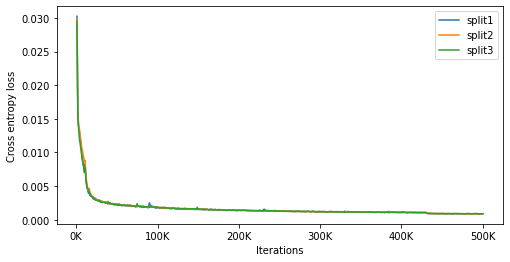

In [57]:
n_shuffles = len(df_train_stats_list)
fig1, axes = plt.subplots(1,1, figsize = (8, 4))
for shuf in range(1,n_shuffles):
    plt.plot(df_train_stats_list[shuf].iteration, df_train_stats_list[shuf].loss, label = f'split{shuf}') 
    plt.xlabel('Iterations')
    plt.ylabel('Cross entropy loss')
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
    plt.legend()

In [53]:

# fig1, axes = plt.subplots(n_shuffles,1, figsize = (8, n_shuffles*4), sharex=True, sharey=True)
# for shuf in range(n_shuffles):
#     axes[shuf].plot(df_train_stats_list[shuf].iteration, df_train_stats_list[shuf].loss) 
#     axes[shuf].set_xlabel('Iterations')
#     axes[shuf].set_ylabel('Cross entropy loss')
#     axes[shuf].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
   